In [1]:
from time import time

import torch
import sklearn.datasets
import sklearn.preprocessing
import sklearn.model_selection
import numpy as np
import math

import onlinehd

In [2]:
def load():
    # fetches data
    x, y = sklearn.datasets.fetch_openml('mnist_784', return_X_y=True)
    x = x.astype(np.float)
    y = y.astype(np.int)
    y = np.array(y)

    # split and normalize
    x, x_test, y, y_test = sklearn.model_selection.train_test_split(x, y)
    scaler = sklearn.preprocessing.Normalizer().fit(x)
    x = scaler.transform(x)
    x_test = scaler.transform(x_test)

    # changes data to pytorch's tensors
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).long()
    x_test = torch.from_numpy(x_test).float()
    y_test = torch.from_numpy(y_test).long()

    return x, x_test, y, y_test

In [3]:
# simple OnlineHD training

print('Loading...')
x, x_test, y, y_test = load()
classes = y.unique().size(0)

Loading...


In [4]:
features = x.size(1)
model = onlinehd.OnlineHD(classes, features, dim=10000)

In [5]:
features = x.size(1)
model = onlinehd.OnlineHD(classes, features)

if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x_test = x_test.cuda()
    y_test = y_test.cuda()
    model = model.to('cuda')
    print('Using GPU!')

print('Training...')
t = time()
model = model.fit(x, y, bootstrap=1.0, lr=0.035, epochs=20)
t = time() - t

Training...


In [6]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.940057
acc_test = 0.935771
t = 10.146113


# Encoding Space

In [6]:
encoding = model.encode(x)
encoding.shape

torch.Size([52500, 4000])

In [7]:
y.shape

torch.Size([52500])

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd

# 2D

No handles with labels found to put in legend.


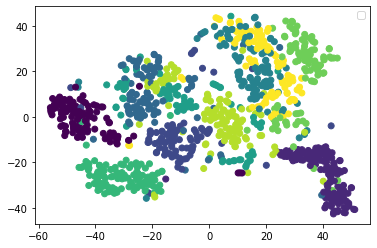

In [9]:
tmp_y = y[0:1000]
tmp_x = encoding[0:1000]

df = pd.DataFrame(tmp_x)
label = tmp_y

tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=label)
plt.legend()
plt.show()

No handles with labels found to put in legend.


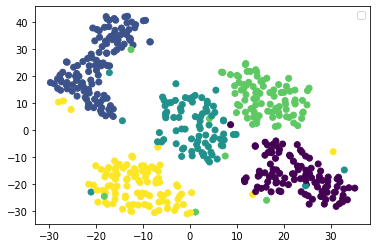

In [10]:
tmp_y = y[y<5][0:500]
tmp_x = encoding[y<5][0:500]

df = pd.DataFrame(tmp_x)
label = tmp_y

tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=label)
plt.legend()
plt.show()

No handles with labels found to put in legend.


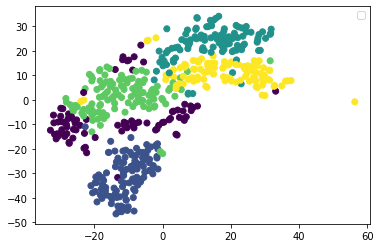

In [11]:
tmp_y = y[y>4][0:500]
tmp_x = encoding[y>4][0:500]

df = pd.DataFrame(tmp_x)
label = tmp_y

tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=label)
plt.legend()
plt.show()

# 3D

/var/folders/4_/4812b_4j2_s0smfmxlqdpr600000gn/T/ipykernel_93669/1169828228.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
No handles with labels found to put in legend.


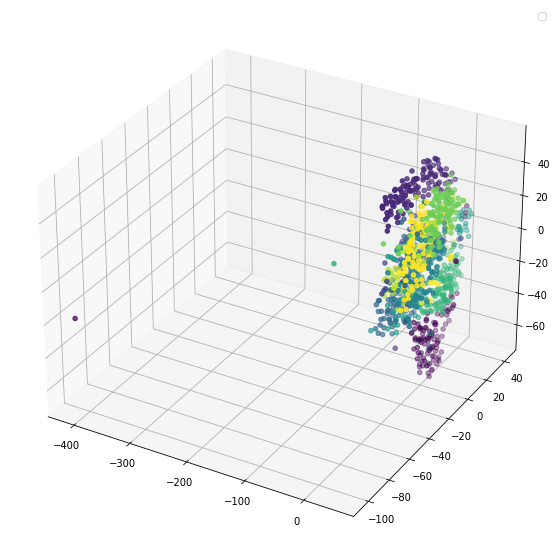

In [12]:
tmp_y = y[0:1000]
tmp_x = encoding[0:1000]

tsne = TSNE(n_components=3, random_state=0)
tsne_results = tsne.fit_transform(tmp_x)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], tsne_results['tsne3'], c=tmp_y)

plt.legend()
plt.show()

/var/folders/4_/4812b_4j2_s0smfmxlqdpr600000gn/T/ipykernel_93669/105353145.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
No handles with labels found to put in legend.


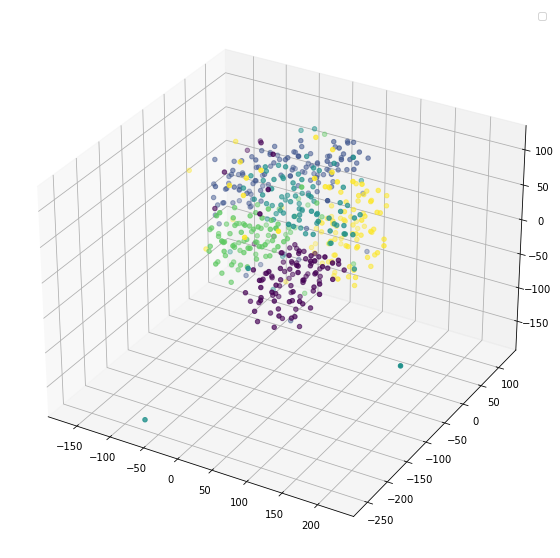

In [13]:
tmp_y = y[y<5][0:500]
tmp_x = encoding[y<5][0:500]

tsne = TSNE(n_components=3, random_state=0)
tsne_results = tsne.fit_transform(tmp_x)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], tsne_results['tsne3'], c=tmp_y)

plt.legend()
plt.show()

/var/folders/4_/4812b_4j2_s0smfmxlqdpr600000gn/T/ipykernel_93669/1457700195.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
No handles with labels found to put in legend.


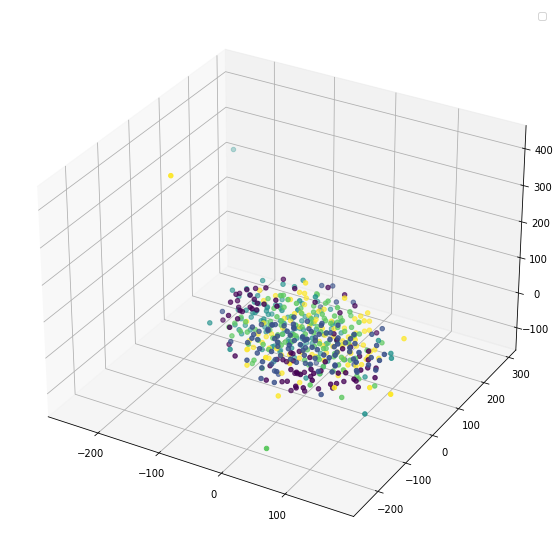

In [14]:
tmp_y = y[y>4][0:500]
tmp_x = encoding[y>4][0:500]

tsne = TSNE(n_components=3, random_state=0)
tsne_results = tsne.fit_transform(tmp_x)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], tsne_results['tsne3'], c=tmp_y)

plt.legend()
plt.show()

/var/folders/4_/4812b_4j2_s0smfmxlqdpr600000gn/T/ipykernel_93669/3965193574.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
No handles with labels found to put in legend.


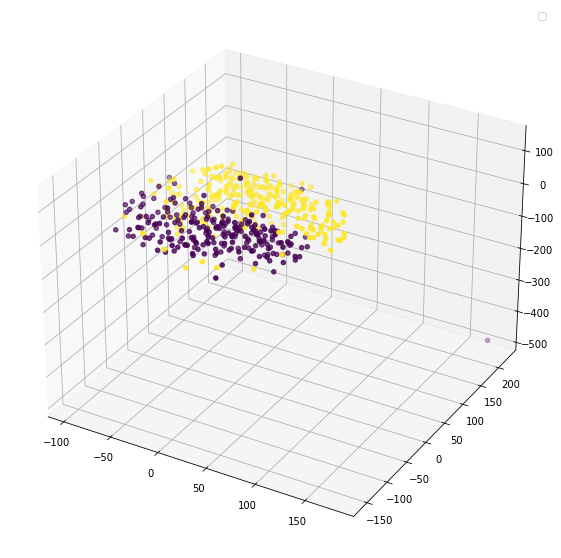

In [15]:
tmp_y = y[y<2][0:500]
tmp_x = encoding[y<2][0:500]

tsne = TSNE(n_components=3, random_state=0)
tsne_results = tsne.fit_transform(tmp_x)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], tsne_results['tsne3'], c=tmp_y)

plt.legend()
plt.show()